In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

SAVE_PATH = r"D:\MS_ExperimentData\general"

In [ ]:
model = ChiralInducedPhaseLag(strengthLambda=0.15, distanceD0=0.5, dt=0.02, phaseLag=0.5 * np.pi, savePath=SAVE_PATH, tqdm=True, overWrite=False)

In [8]:
model.run(10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

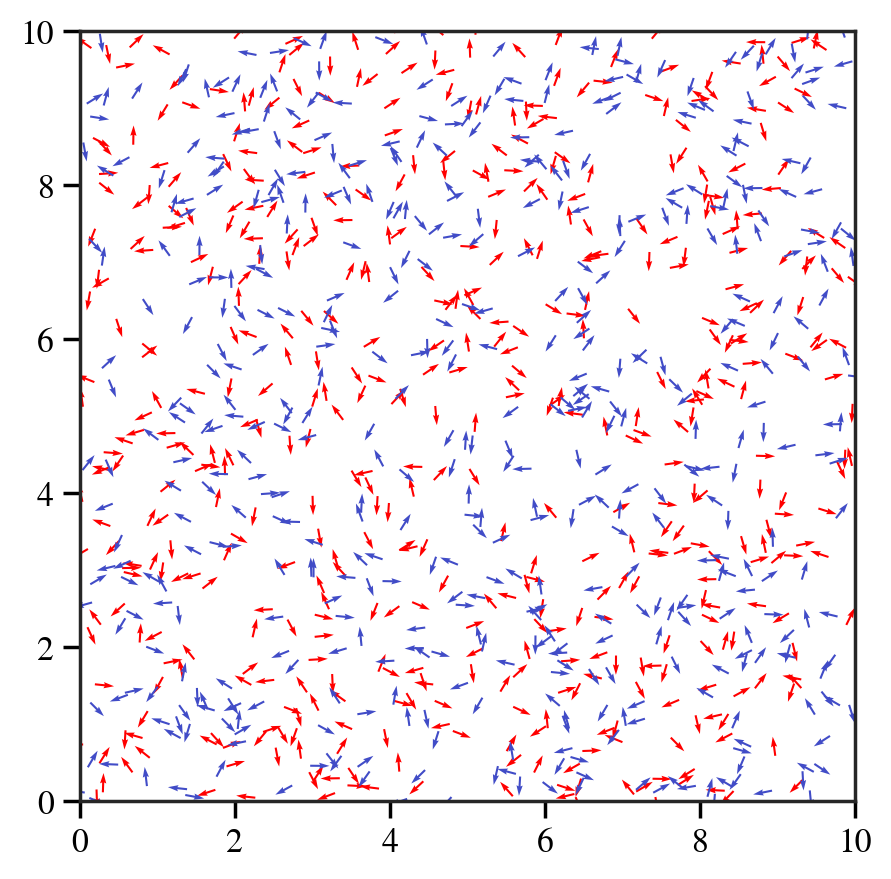

In [7]:
model.plot()

([], [])

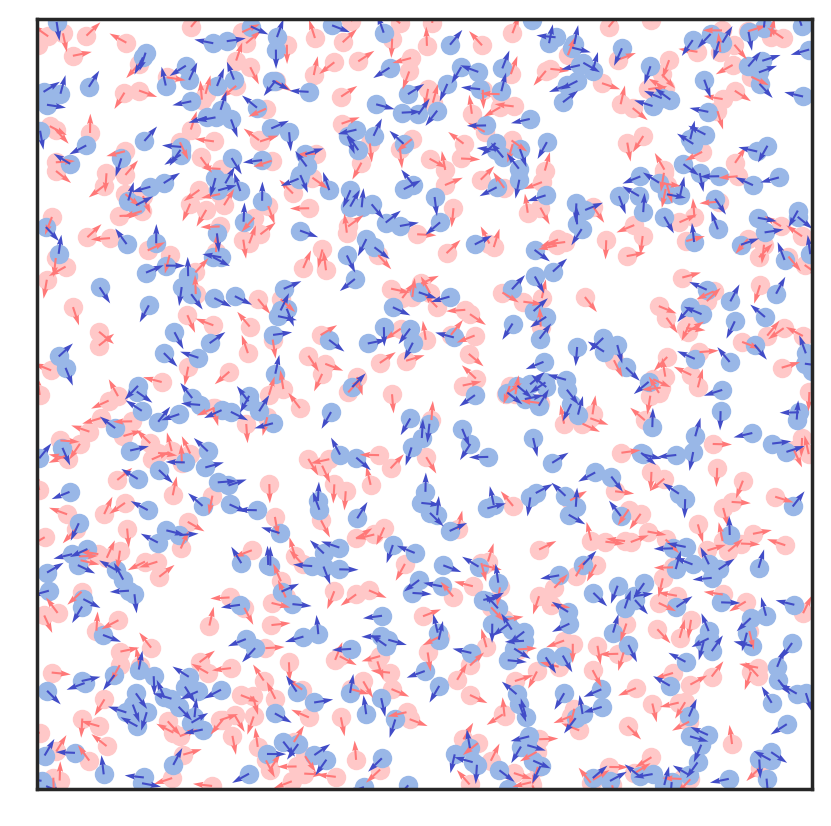

In [30]:
self = model

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(
    self.positionX[:self.agentsNum // 2, 0], self.positionX[:self.agentsNum // 2, 1],
    color="#FFC8C8", # edgecolors="black"
)
plt.scatter(
    self.positionX[self.agentsNum // 2:, 0], self.positionX[self.agentsNum // 2:, 1],
    color="#99B7E7", # edgecolors="black"
)
plt.quiver(
    self.positionX[:self.agentsNum // 2, 0], self.positionX[:self.agentsNum // 2, 1],
    np.cos(self.phaseTheta[:self.agentsNum // 2]), np.sin(self.phaseTheta[:self.agentsNum // 2]), color="#FF7878"
)
plt.quiver(
    self.positionX[self.agentsNum // 2:, 0], self.positionX[self.agentsNum // 2:, 1],
    np.cos(self.phaseTheta[self.agentsNum // 2:]), np.sin(self.phaseTheta[self.agentsNum // 2:]), color="#414CC7"
)
plt.xlim(0, self.boundaryLength)
plt.ylim(0, self.boundaryLength)
plt.xticks([], [])
plt.yticks([], [])

In [3]:
sa = StateAnalysis(model)

([], [])

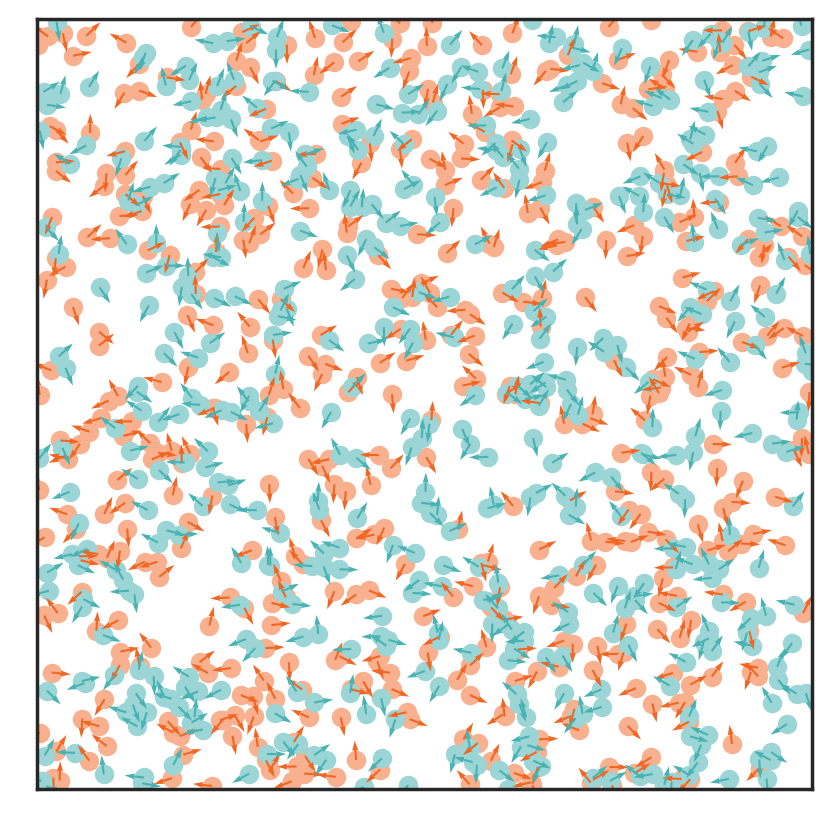

In [32]:
self = sa.model

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(
    self.positionX[:self.agentsNum // 2, 0], self.positionX[:self.agentsNum // 2, 1],
    color="#F8B08E", # edgecolors="black"
)
plt.scatter(
    self.positionX[self.agentsNum // 2:, 0], self.positionX[self.agentsNum // 2:, 1],
    color="#9BD5D5", # edgecolors="black"
)
plt.quiver(
    self.positionX[:self.agentsNum // 2, 0], self.positionX[:self.agentsNum // 2, 1],
    np.cos(self.phaseTheta[:self.agentsNum // 2]), np.sin(self.phaseTheta[:self.agentsNum // 2]), color="#F16623"
)
plt.quiver(
    self.positionX[self.agentsNum // 2:, 0], self.positionX[self.agentsNum // 2:, 1],
    np.cos(self.phaseTheta[self.agentsNum // 2:]), np.sin(self.phaseTheta[self.agentsNum // 2:]), color="#49B2B2"
)
plt.xlim(0, self.boundaryLength)
plt.ylim(0, self.boundaryLength)
plt.xticks([], [])
plt.yticks([], [])

[]

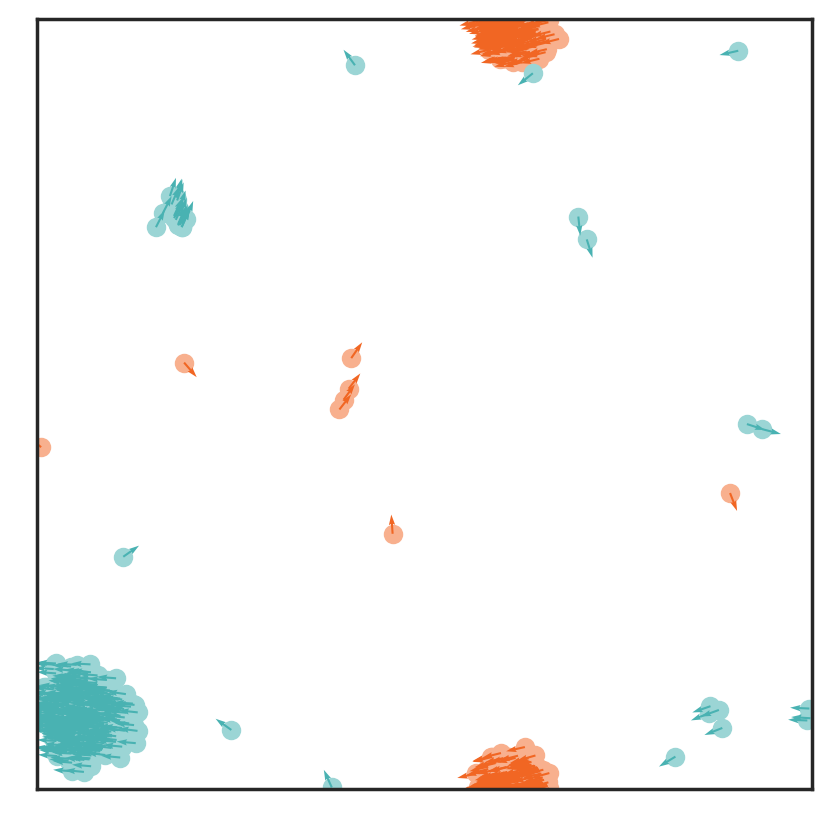

In [38]:
self = sa
index = -1
oscis = None
ax = None

positionX, phaseTheta, pointTheta = self.get_state(index)

if ax is None:
    fig, ax = plt.subplots(figsize=(5, 5))
if oscis is None:
    oscis = np.arange(self.model.agentsNum)

plt.scatter(
    positionX[:self.model.agentsNum // 2, 0], positionX[:self.model.agentsNum // 2, 1],
    color="#F8B08E", # edgecolors="black"
)
plt.scatter(
    positionX[self.model.agentsNum // 2:, 0], positionX[self.model.agentsNum // 2:, 1],
    color="#9BD5D5", # edgecolors="black"
)
plt.quiver(
    positionX[:self.model.agentsNum // 2, 0], positionX[:self.model.agentsNum // 2, 1],
    np.cos(phaseTheta[:self.model.agentsNum // 2]), np.sin(phaseTheta[:self.model.agentsNum // 2]), color="#F16623"
)
plt.quiver(
    positionX[self.model.agentsNum // 2:, 0], positionX[self.model.agentsNum // 2:, 1],
    np.cos(phaseTheta[self.model.agentsNum // 2:]), np.sin(phaseTheta[self.model.agentsNum // 2:]), color="#49B2B2"
)
ax.set_xlim(0, self.model.boundaryLength)
ax.set_ylim(0, self.model.boundaryLength)
ax.set_xticks([], [])
ax.set_yticks([], [])

In [2]:
omegaMins = np.linspace(0.1, 0.5, 30)
phaseLags = np.linspace(-1, 1, 30) * np.pi
randomSeed = 9
strengthLambda = 0.15
distanceD0 = 0.5
deltaOmega = 1
halfAgentsNum = 500
Homega = np.block([
    [np.ones((halfAgentsNum, halfAgentsNum)), np.zeros((halfAgentsNum, halfAgentsNum))],
    [np.zeros((halfAgentsNum, halfAgentsNum)), np.ones((halfAgentsNum, halfAgentsNum))]
])

SAVE_PATH = r"D:\MS_ExperimentData\general"

In [3]:
phaseLag = phaseLags[7]
omegaMin = omegaMins[0]

model = ChiralInducedPhaseLag(strengthLambda=strengthLambda, distanceD0=distanceD0, boundaryLength=10,
                            phaseLag=phaseLag, agentsNum=1000,
                            omegaMin=omegaMin, deltaOmega=deltaOmega,
                            savePath=SAVE_PATH, dt=0.02,
                            tqdm=True, overWrite=True, randomSeed=randomSeed)

sa = StateAnalysis(model)

In [8]:
step = 10
SiValues = []
for lastTindex in np.arange(1, sa.TNum, step):
    positionX, phaseTheta, pointTheta = sa.get_state(index=lastTindex)

    positionx, positiony = positionX[:, 0], positionX[:, 1]
    centers = np.array([
        positionx - model.speedV * model.dt / pointTheta * np.sin(phaseTheta),
        positiony + model.speedV * model.dt / pointTheta * np.cos(phaseTheta)
    ]).T
    deltaX = ChiralInducedPhaseLag._delta_x(
        centers, centers[:, np.newaxis], 
        sa.model.boundaryLength, sa.model.halfBoundaryLength
    )
    # deltaX = ChiralInducedPhaseLag._delta_x(
    #     positionX, positionX[:, np.newaxis], 
    #     sa.model.boundaryLength, sa.model.halfBoundaryLength
    # )
    Aij = ChiralInducedPhaseLag.distance_x(deltaX) <= sa.model.distanceD0
    Si = (Homega * Aij).sum(axis=0) / Aij.sum(axis=0)
    SiValues.append(Si)

SiValues = np.array(SiValues)
SValues = SiValues.mean(axis=1)

RiValues = []
for lastTindex in np.arange(0, sa.TNum, step):
    positionX, phaseTheta, pointTheta = sa.get_state(index=lastTindex)

    deltaX = ChiralInducedPhaseLag._delta_x(
        positionX, positionX[:, np.newaxis], 
        sa.model.boundaryLength, sa.model.halfBoundaryLength
    )
    Aij = ChiralInducedPhaseLag.distance_x(deltaX) <= sa.model.distanceD0
    AijMulHomega = Aij
    Ri = (
        ((np.sin(phaseTheta) * AijMulHomega).sum(axis=1) / AijMulHomega.sum(axis=1)) ** 2 +
        ((np.cos(phaseTheta) * AijMulHomega).sum(axis=1) / AijMulHomega.sum(axis=1)) ** 2
    ) ** 0.5
    RiValues.append(Ri)
    
RiValues = np.array(RiValues)
RValues = RiValues.mean(axis=1)

In [5]:
tsCenters = []
length = sa.totalPhaseTheta.shape[0]

for i in tqdm(range(1, length)):
    positionx = sa.totalPositionX[i, :, 0]
    positiony = sa.totalPositionX[i, :, 1]
    pointTheta = sa.totalPointTheta[i, :]
    omegaTheta = model.omegaTheta

    center = np.array([
        positionx - model.speedV * model.dt / pointTheta * np.sin(sa.totalPhaseTheta[i, :]),
        positiony + model.speedV * model.dt / pointTheta * np.cos(sa.totalPhaseTheta[i, :])
    ]).T
    # sa.lookIndex = i
    # center = sa.centers
    # center = sa.totalPositionX[i]
    tsCenters.append(center)

tsCenters.insert(0, tsCenters[0])
totalCenters = np.array(tsCenters)
tsCenters = np.concatenate(tsCenters)
tsCenters = np.mod(tsCenters, model.boundaryLength)
totalCenters = np.mod(totalCenters, model.boundaryLength)
tRanges = np.arange(length).repeat(1000)

rawClass1, rawClass2 = (
    np.concatenate([np.ones(500), np.zeros(500)]).astype(bool), 
    np.concatenate([np.zeros(500), np.ones(500)]).astype(bool)
)
class1 = np.concatenate([rawClass1] * length)
class2 = np.concatenate([rawClass2] * length)

color = ["#F16623"] * 500 + ["#49B2B2"] * 500
colors = np.array(color * (tRanges.shape[0] // 1000))

  0%|          | 0/6001 [00:00<?, ?it/s]

(0.0, 6001.0)

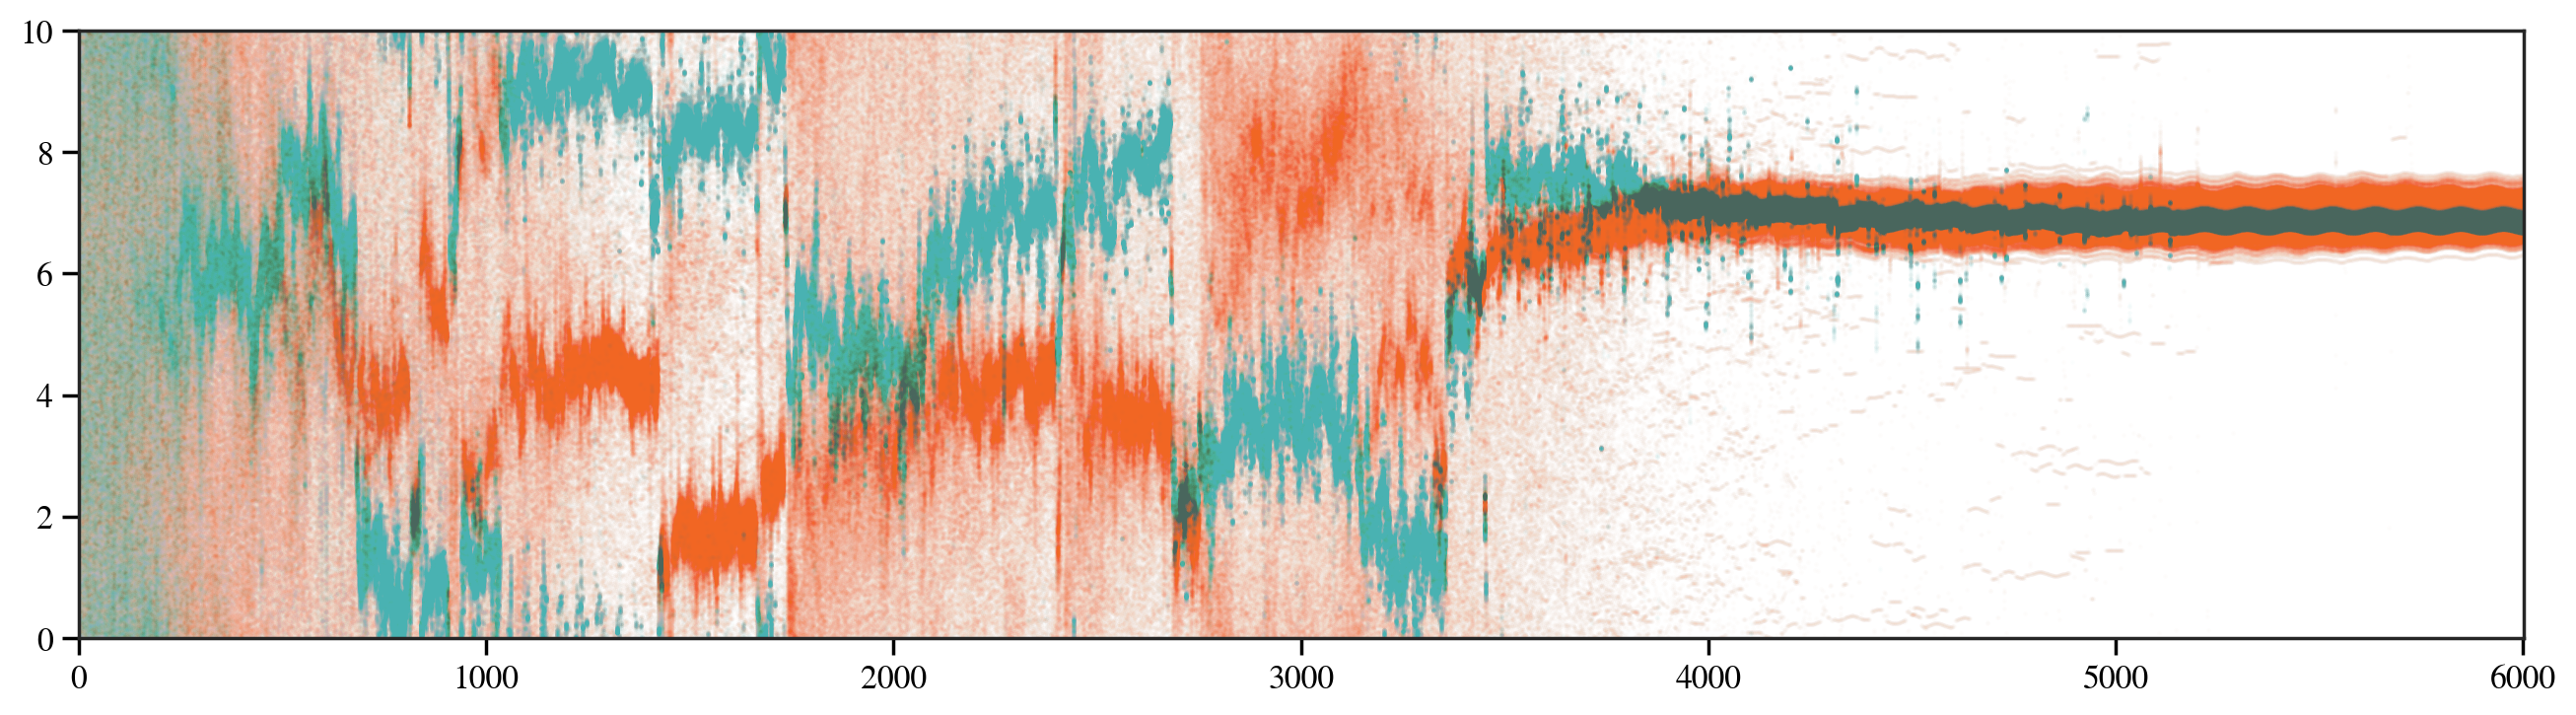

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
s = 0.5
alpha = 0.01

plt.scatter(tRanges[class1], tsCenters[class1, 0], s=s, alpha=alpha, color="#F16623")
plt.scatter(tRanges[class2], tsCenters[class2, 0], s=s, alpha=alpha, color="#49B2B2")
plt.ylim(0, 10)
plt.xlim(0, tRanges[-1])

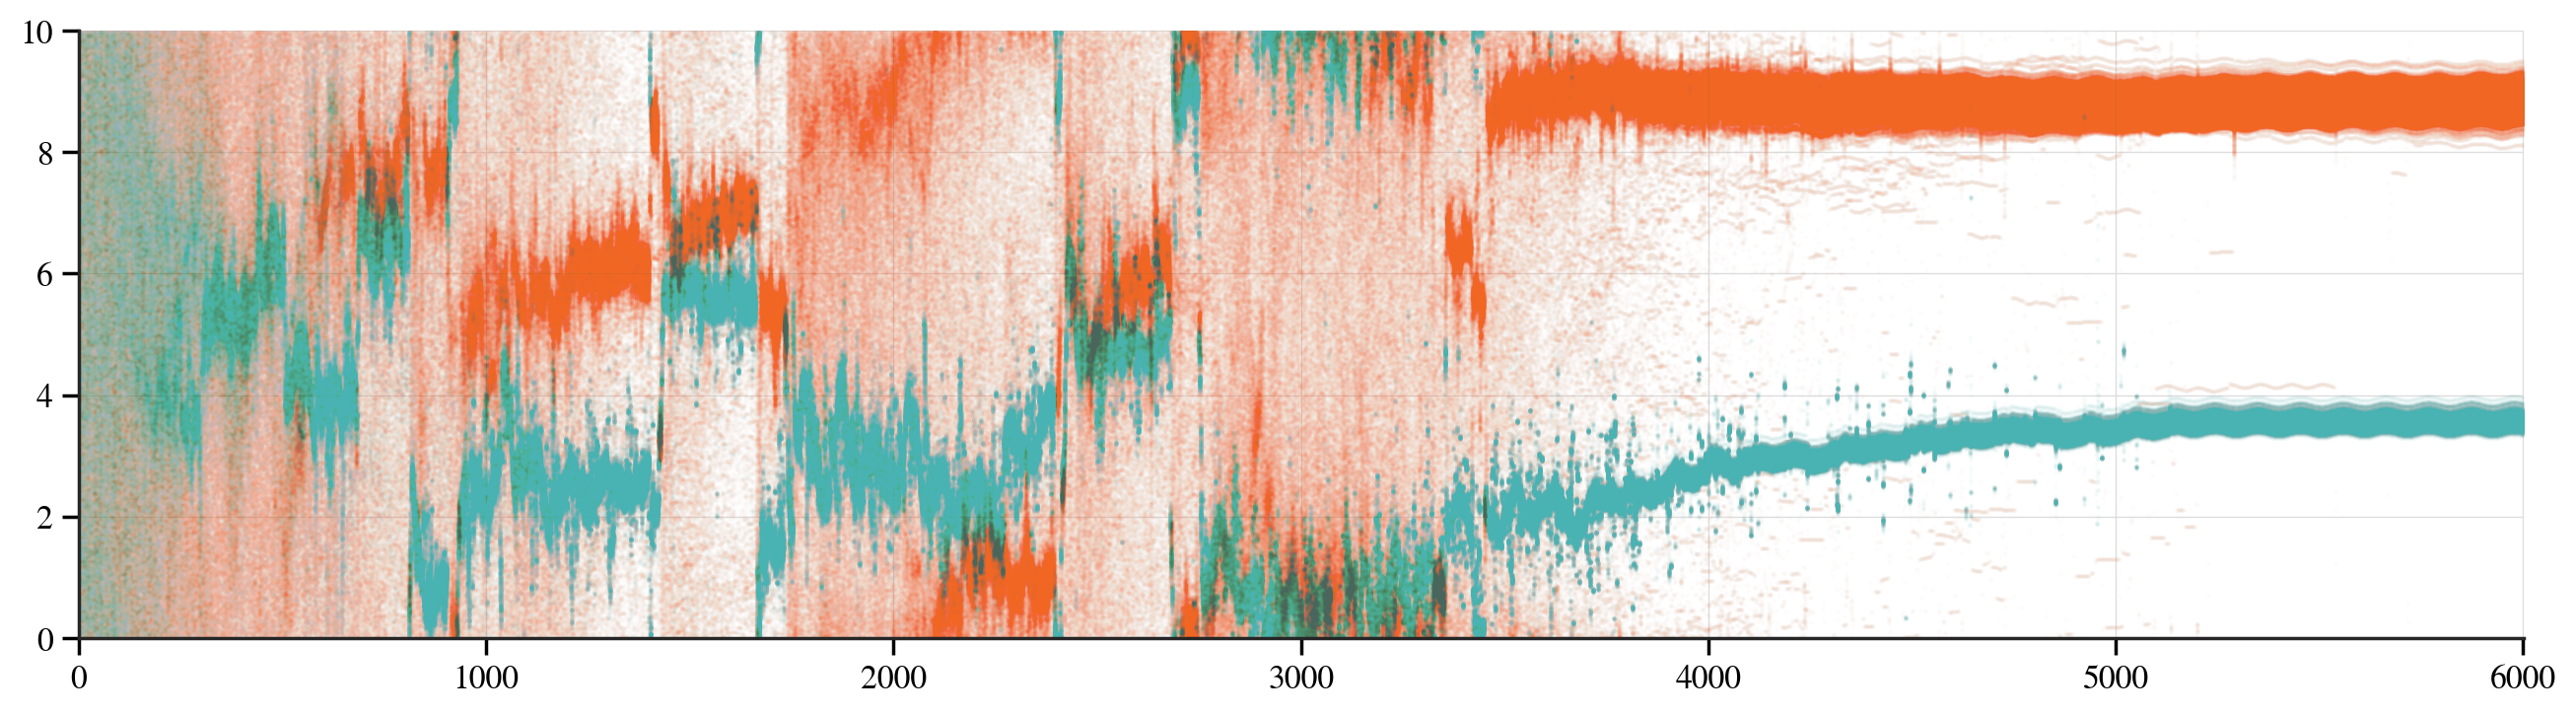

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
s = 0.5
alpha = 0.01

plt.scatter(tRanges[class1], tsCenters[class1, 1], s=s, alpha=alpha, color="#F16623")
plt.scatter(tRanges[class2], tsCenters[class2, 1], s=s, alpha=alpha, color="#49B2B2")
plt.ylim(0, 10)
plt.xlim(0, tRanges[-1])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(True)

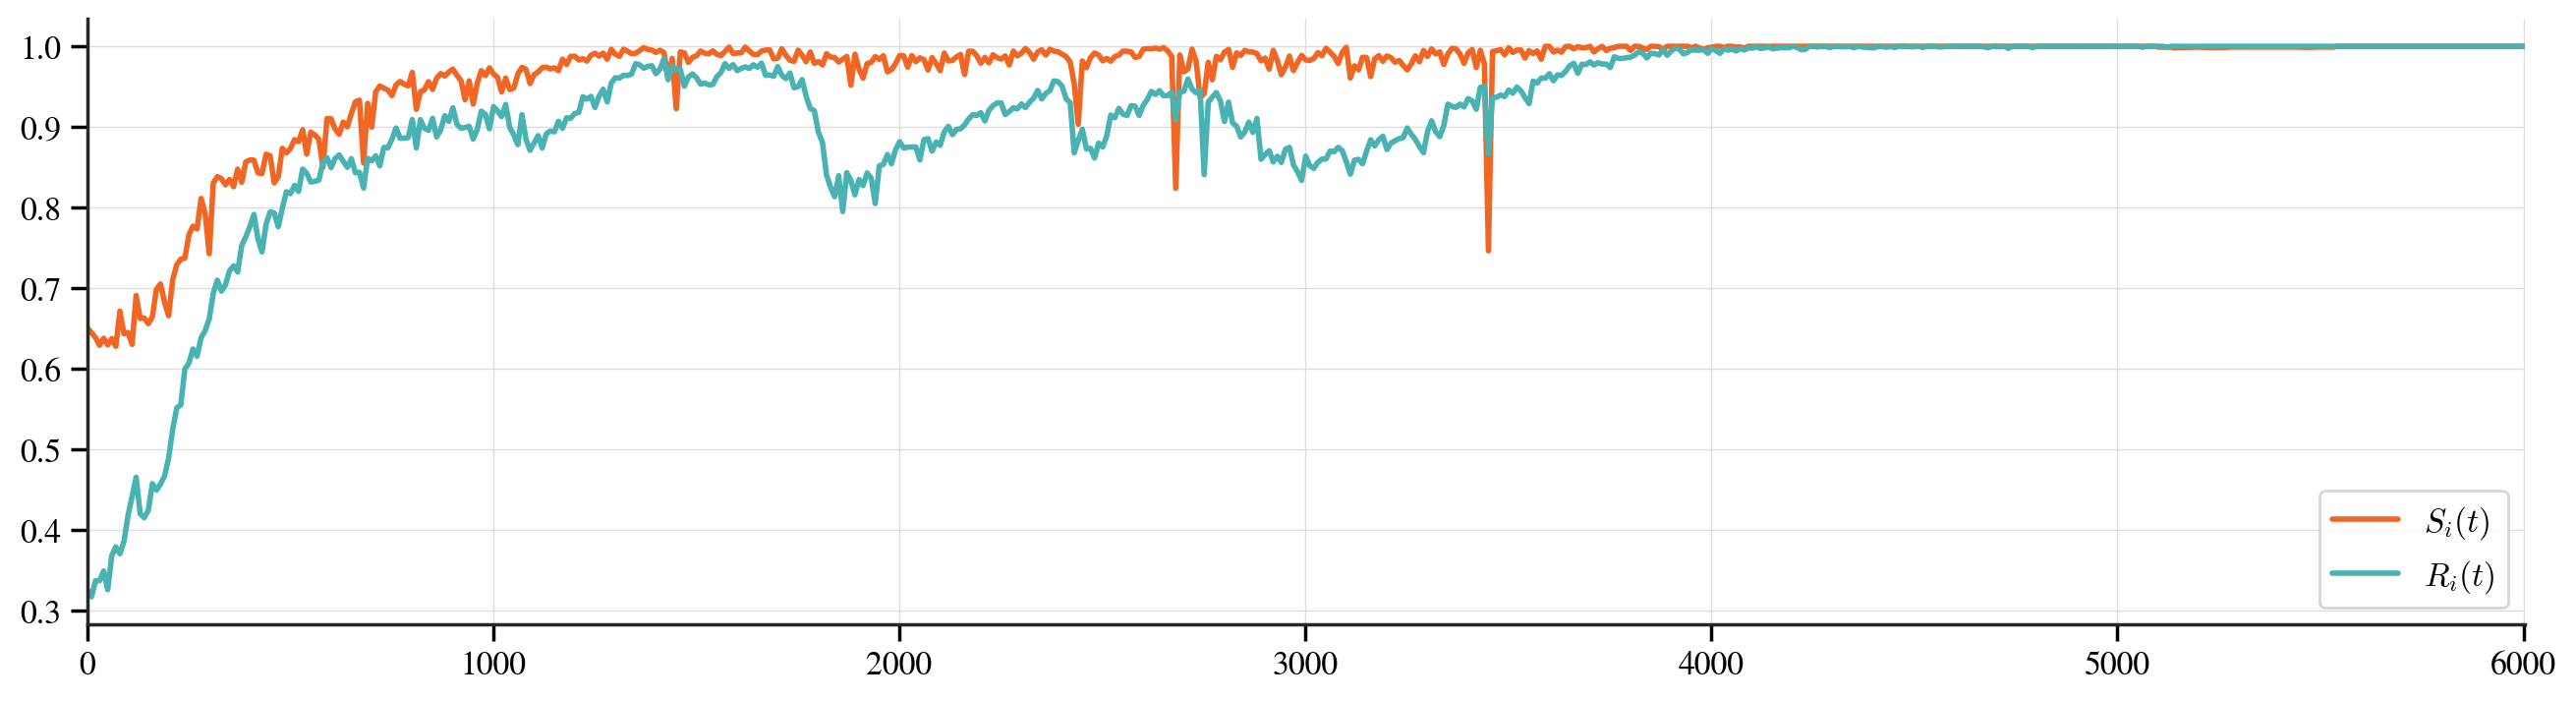

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

win = 1

ax.plot(np.arange(1, sa.TNum, 10), pd.Series(SValues).rolling(win, center=True).mean().values, lw=2, color="#F16623", label=r"$S_i(t)$")
ax.plot(np.arange(1, sa.TNum, 10), pd.Series(RValues).rolling(win, center=True).mean().values, lw=2, color="#49B2B2", label=r"$R_i(t)$")
ax.set_xlim(0, sa.TNum)
ax.legend(loc="lower right", fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(True)

In [4]:
tsCenters = []
# length = 100
length = sa.totalPhaseTheta.shape[0]

for i in tqdm(range(1, length, 1)):
    positionx = sa.totalPositionX[i, :, 0]
    positiony = sa.totalPositionX[i, :, 1]
    pointTheta = sa.totalPointTheta[i, :]
    omegaTheta = model.omegaTheta

    center = np.array([
        positionx - model.speedV * model.dt / pointTheta * np.sin(sa.totalPhaseTheta[i, :]),
        positiony + model.speedV * model.dt / pointTheta * np.cos(sa.totalPhaseTheta[i, :])
    ]).T
    # sa.lookIndex = i
    # center = sa.centers
    # center = sa.totalPositionX[i]
    tsCenters.append(center)

tsCenters.insert(0, tsCenters[0])
totalCenters = np.array(tsCenters)
tsCenters = np.concatenate(tsCenters)
tsCenters = np.mod(tsCenters, model.boundaryLength)
totalCenters = np.mod(totalCenters, model.boundaryLength)
tRanges = np.arange(length).repeat(1000)

rawClass1, rawClass2 = (
    np.concatenate([np.ones(500), np.zeros(500)]).astype(bool), 
    np.concatenate([np.zeros(500), np.ones(500)]).astype(bool)
)
class1 = np.concatenate([rawClass1] * length)
class2 = np.concatenate([rawClass2] * length)

color = ["#F16623"] * 500 + ["#49B2B2"] * 500
colors = np.array(color * (tRanges.shape[0] // 1000))

  0%|          | 0/6001 [00:00<?, ?it/s]

pass


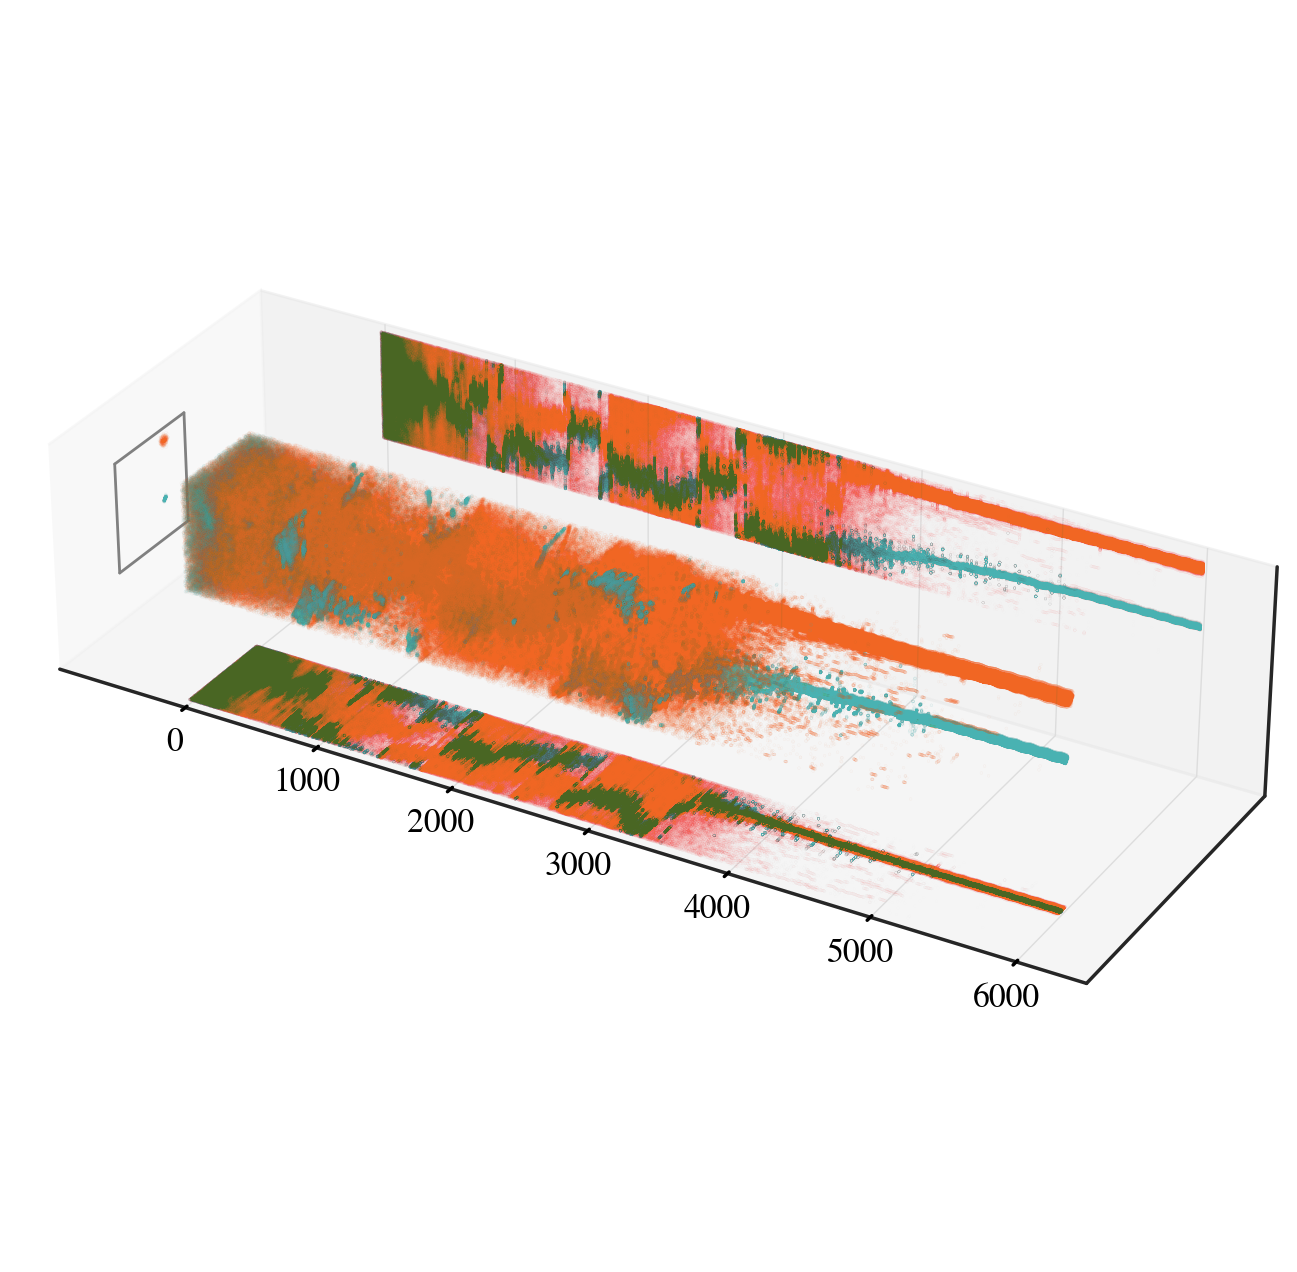

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
lowLim = -10
backLim = 30
alpha1 = 0.1
alpha2 = 0.01
s = 0.01

ax.scatter(tRanges, tsCenters[:, 0], tsCenters[:, 1], s=s, alpha=alpha1, c=colors)

bottom = -500

ax.scatter(bottom, totalCenters[-1, rawClass1, 0], totalCenters[-1, rawClass1, 1], s=s, alpha=alpha1, color="#F16623")
ax.scatter(bottom, totalCenters[-1, rawClass2, 0], totalCenters[-1, rawClass2, 1], s=s, alpha=alpha1, color="#49B2B2")
ax.plot3D([bottom, bottom], [0, 0], [10, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [10, 10], [10, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [0, 10], [0, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [0, 10], [10, 10], 'gray', lw=1)

ax.scatter(tRanges, tsCenters[:, 0], np.ones_like(tsCenters[:, 1]) * lowLim, s=s, alpha=alpha2, c=colors)

ax.scatter(tRanges, np.ones_like(tsCenters[:, 0]) * backLim, tsCenters[:, 1], s=s, alpha=alpha2, c=colors)

ax.set_ylim(0, backLim)
ax.set_zlim(lowLim, 10)
ax.set_box_aspect([3, 1, 1 / backLim * (10 - lowLim)])
ax.set_yticks([], [])
ax.set_zticks([], [])
ax.set_xticks(ax.get_xticks()[1:-1])
print("pass")
plt.savefig("./figs/3d2.png", dpi=300, bbox_inches="tight")

pass


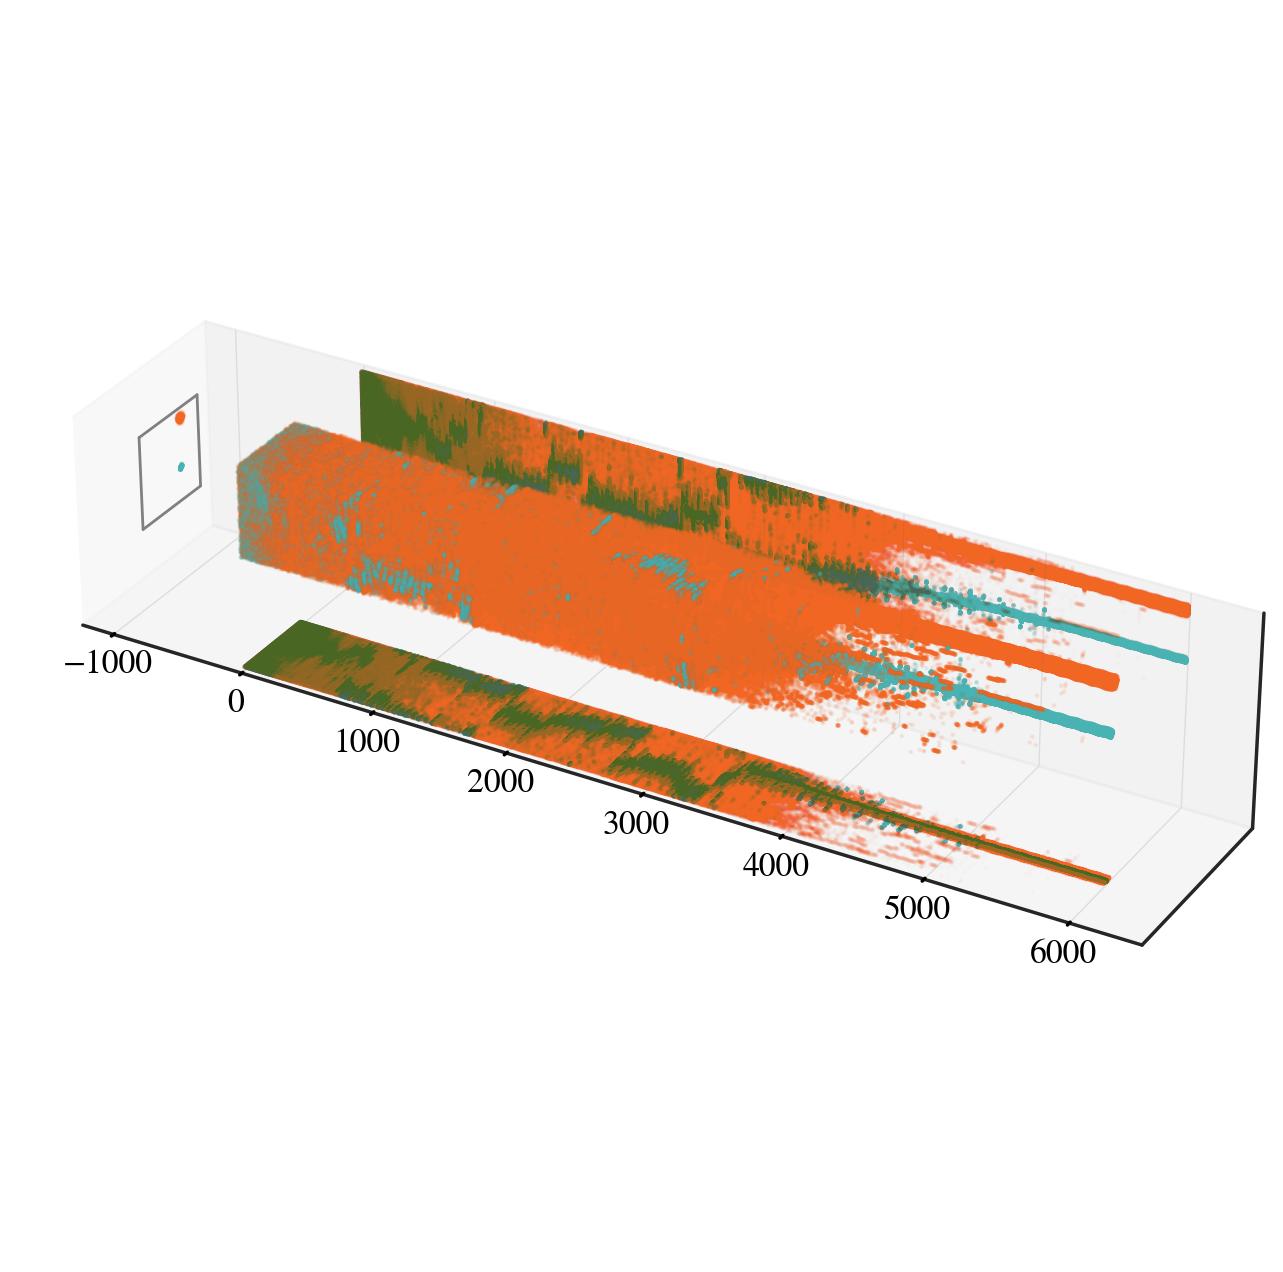

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
lowLim = -12
backLim = 22
alpha1 = 0.1
alpha2 = 0.01

ax.scatter(tRanges, tsCenters[:, 0], tsCenters[:, 1], s=0.5, alpha=alpha1, c=colors)

bottom = -750

ax.scatter(bottom, totalCenters[-1, rawClass1, 0], totalCenters[-1, rawClass1, 1], s=0.5, alpha=alpha1, color="#F16623")
ax.scatter(bottom, totalCenters[-1, rawClass2, 0], totalCenters[-1, rawClass2, 1], s=0.5, alpha=alpha1, color="#49B2B2")
ax.plot3D([bottom, bottom], [0, 0], [10, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [10, 10], [10, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [0, 10], [0, 0], 'gray', lw=1)
ax.plot3D([bottom, bottom], [0, 10], [10, 10], 'gray', lw=1)

ax.scatter(tRanges, tsCenters[:, 0], np.ones_like(tsCenters[:, 1]) * lowLim, s=0.5, alpha=alpha2, c=colors)
# ax.scatter(tRanges[class1], tsCenters[class1, 0], np.ones_like(tsCenters[class1, 1]) * lowLim, s=0.5, alpha=alpha2, color="#F16623")
# ax.scatter(tRanges[class2], tsCenters[class2, 0], np.ones_like(tsCenters[class2, 1]) * lowLim, s=0.5, alpha=alpha2, color="#49B2B2")

ax.scatter(tRanges, np.ones_like(tsCenters[:, 0]) * backLim, tsCenters[:, 1], s=0.5, alpha=alpha2, c=colors)
# ax.scatter(tRanges[class1], np.ones_like(tsCenters[class1, 0]) * backLim, tsCenters[class1, 1], s=0.5, alpha=alpha2, color="#F16623")
# ax.scatter(tRanges[class2], np.ones_like(tsCenters[class2, 0]) * backLim, tsCenters[class2, 1], s=0.5, alpha=alpha2, color="#49B2B2")

ax.set_ylim(0, backLim)
ax.set_zlim(lowLim, 10)
ax.set_box_aspect([5, 1, 1])
ax.set_yticks([], [])
ax.set_zticks([], [])
ax.set_xticks(ax.get_xticks()[1:-1])
print("pass")
plt.savefig("./figs/3d.png", dpi=300, bbox_inches="tight")